In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load the Data**

In [239]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Goal4.csv')
df.shape

(191762, 52)

In [240]:
df.describe() 

,Goal,GeoAreaCode,TimePeriod,Value,TimeCoverage,UpperBound,LowerBound,BasePeriod,GeoInfoUrl,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
count,191762.0,191762.000000,191762.000000,179570.000000,0.0,0.0,0.0,2276.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.0,396.544002,2010.212284,41.595042,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,250.320400,5.169051,41.230603,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,1.000000,2000.000000,0.000000,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.0,188.000000,2006.000000,1.001600,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.0,372.000000,2011.000000,34.134145,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.0,600.000000,2015.000000,83.482728,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.0,921.000000,2020.000000,1632.065770,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
df.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod', 'Source',
       'GeoInfoUrl', 'FootNote', 'Age', 'Education level', 'Location',
       'Nature', 'Quantile', 'Reporting Type', 'Sex', 'Type of skill', 'Units',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')

Choosing the SeriesDescription as the Proportion of children and young people achieving a minimum proficiency level in reading and mathematics (%)

In [242]:
df["SeriesDescription"].unique()

array(['Proportion of children and young people achieving a minimum proficiency level in reading and mathematics (%)',
       'Completion rate, by sex, location, wealth quintile and education level (%)',
       'Proportion of children aged 36−59 months who are developmentally on track in at least three of the following domains: literacy-numeracy, physical development, social-emotional development, and learning (% of children aged 36-59 months)',
       'Participation rate in organized learning (one year before the official primary entry age), by sex (%)',
       'Participation rate in formal and non-formal education and training, by sex (%)',
       'Proportion of youth and adults with information and communications technology (ICT) skills, by sex and type of skill (%)',
       'Adjusted gender parity index for completion rate, by sex, location, wealth quintile and education level',
       'Adjusted location parity index for completion rate, by sex, location, wealth quintile and educat

In [ ]:
df_SeriesDescription = df[df["SeriesDescription"] == "Proportion of children and young people achieving a minimum proficiency level in reading and mathematics (%)"]

In [ ]:
df_SeriesDescription

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,TimeCoverage,UpperBound,LowerBound,BasePeriod,Source,GeoInfoUrl,FootNote,Age,Education level,Location,Nature,Quantile,Reporting Type,Sex,Type of skill,Units,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,11.000000,2013,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,SKILL_MATH,PERCENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,13.000000,2013,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,21.500000,2016,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,GRAD23,NaN,C,NaN,G,MALE,SKILL_READ,PERCENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.500000,2016,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,GRAD23,NaN,C,NaN,G,FEMALE,SKILL_READ,PERCENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.000000,2016,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,GRAD23,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,894,Zambia,2015,5.043495,2015,NaN,NaN,NaN,NaN,PISA D 2015,NaN,NaN,NaN,LOWSEC,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3985,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,894,Zambia,2015,1.942508,2015,NaN,NaN,NaN,NaN,PISA D 2015,NaN,NaN,NaN,LOWSEC,NaN,C,NaN,G,MALE,SKILL_MATH,PERCENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3986,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,894,Zambia,2015,2.634564,2015,NaN,NaN,NaN,NaN,PISA D 2015,NaN,NaN,NaN,LOWSEC,NaN,C,NaN,G,FEMALE,SKILL_MATH,PERCENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3987,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,894,Zambia,2015,2.298457,2015,NaN,NaN,NaN,NaN,PISA D 2015,NaN,NaN,NaN,LOWSEC,NaN,C,NaN,G,BOTHSEX,SKILL_MATH,PERCENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_SeriesDescription.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod', 'Source',
       'GeoInfoUrl', 'FootNote', 'Age', 'Education level', 'Location',
       'Nature', 'Quantile', 'Reporting Type', 'Sex', 'Type of skill', 'Units',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')

**Get the details of the missing and unique values to find the noisy data and duplicate data**

In [ ]:
for column in df_SeriesDescription.columns:
    print("Column: ", column)
    print("Missing values: ", df[column].isnull().sum())
    print("Unique values: ", df[column].unique())

Column:  Goal
Missing values:  0
Unique values:  [4]
Column:  Target
Missing values:  0
Unique values:  [4.1 4.2 4.3 4.4 4.5 '4.5' '4.6' '4.a' '4.b' '4.c']
Column:  Indicator
Missing values:  0
Unique values:  ['4.1.1' '4.1.2' '4.2.1' '4.2.2' '4.3.1' '4.4.1' '4.5.1' '4.6.1' '4.a.1'
 '4.b.1' '4.c.1']
Column:  SeriesCode
Missing values:  0
Unique values:  ['SE_TOT_PRFL' 'SE_TOT_CPLR' 'SE_DEV_ONTRK' 'SE_PRE_PARTN'
 'SE_ADT_EDUCTRN' 'SE_ADT_ACTS' 'SE_AGP_CPRA' 'SE_ALP_CPLR' 'SE_AWP_CPRA'
 'SE_GPI_ICTS' 'SE_GPI_PART' 'SE_GPI_PTNPRE' 'SE_GPI_TCAQ' 'SE_IMP_FPOF'
 'SE_LGP_ACHI' 'SE_NAP_ACHI' 'SE_TOT_GPI' 'SE_TOT_RUPI' 'SE_TOT_SESPI'
 'SE_ADT_FUNS' 'SE_ACC_HNDWSH' 'SE_ACS_CMPTR' 'SE_ACS_ELECT' 'SE_ACS_H2O'
 'SE_ACS_INTNT' 'SE_ACS_SANIT' 'SE_INF_DSBL' 'DC_TOF_SCHIPSL'
 'SE_TRA_GRDL']
Column:  SeriesDescription
Missing values:  0
Unique values:  ['Proportion of children and young people achieving a minimum proficiency level in reading and mathematics (%)'
 'Completion rate, by sex, location, weal

In [ ]:
Drop_Columns=[ "Goal", "SeriesDescription", "BasePeriod", "TimeCoverage", "UpperBound", "LowerBound", "GeoInfoUrl", "Unnamed: 26", "Unnamed: 27", "Unnamed: 28", "Unnamed: 29", "Unnamed: 30", "Unnamed: 31", "Unnamed: 32", "Unnamed: 33", "Unnamed: 34", "Unnamed: 35", "Unnamed: 36", "Unnamed: 37", "Unnamed: 38", "Unnamed: 39", "Unnamed: 40", "Unnamed: 41", "Unnamed: 42", "Unnamed: 43", "Unnamed: 44", "Unnamed: 45", "Unnamed: 46", "Unnamed: 47", "Unnamed: 48", "Unnamed: 49", "Unnamed: 50", "Unnamed: 51"]

**Percentage of missing values**

In [ ]:
df_SeriesDescription.isnull().mean()

Goal                 0.0
Target               0.0
Indicator            0.0
SeriesCode           0.0
SeriesDescription    0.0
GeoAreaCode          0.0
GeoAreaName          0.0
TimePeriod           0.0
Value                0.0
Time_Detail          0.0
TimeCoverage         1.0
UpperBound           1.0
LowerBound           1.0
BasePeriod           1.0
Source               0.0
GeoInfoUrl           1.0
FootNote             1.0
Age                  1.0
Education level      0.0
Location             1.0
Nature               0.0
Quantile             1.0
Reporting Type       0.0
Sex                  0.0
Type of skill        0.0
Units                0.0
Unnamed: 26          1.0
Unnamed: 27          1.0
Unnamed: 28          1.0
Unnamed: 29          1.0
Unnamed: 30          1.0
Unnamed: 31          1.0
Unnamed: 32          1.0
Unnamed: 33          1.0
Unnamed: 34          1.0
Unnamed: 35          1.0
Unnamed: 36          1.0
Unnamed: 37          1.0
Unnamed: 38          1.0
Unnamed: 39          1.0


In [ ]:
df_SeriesDescription = df_SeriesDescription.drop(Drop_Columns, axis =1)

In [ ]:
df_SeriesDescription.describe()

,GeoAreaCode,TimePeriod,Value
count,3989.000000,3989.000000,3989.000000
mean,428.428177,2010.154174,62.595209
std,244.082691,5.333421,25.898100
min,4.000000,2000.000000,0.900000
25%,214.000000,2006.000000,43.120000
50%,414.000000,2011.000000,69.549308
75%,634.000000,2015.000000,83.340000
max,894.000000,2019.000000,99.683330


In [ ]:
df_SeriesDescription.isnull().mean()

Target             0.0
Indicator          0.0
SeriesCode         0.0
GeoAreaCode        0.0
GeoAreaName        0.0
TimePeriod         0.0
Value              0.0
Time_Detail        0.0
Source             0.0
FootNote           1.0
Age                1.0
Education level    0.0
Location           1.0
Nature             0.0
Quantile           1.0
Reporting Type     0.0
Sex                0.0
Type of skill      0.0
Units              0.0
dtype: float64

In [ ]:
missing_columns = ["Value", "Education level", "Location", "Quantile", "Sex"]

In [ ]:
df[missing_columns]

Numerical : value

Categorical : sex, Education Level, Location, Quantile

**Drop the values of the Value feature having the Nan value**



In [ ]:
df= df.dropna(subset=["Value"], axis = 0)

**Impute the missing values using the mode which is group by GeoArea **

In [ ]:
def fill_mode_for_Categorical_attribute(df, columns):
    for c in columns :
        most_frequent_value =df[c].mode()[0]
        df[c].fillna(most_frequent_value,inplace=True)
    return df

In [ ]:
df = fill_mode_for_Categorical_attribute(df, ["Education level", "Location", "Quantile", "Sex"])

In [ ]:
df_SeriesDescription = df_SeriesDescription.drop(["Age", "BasePeriod", "FootNote", "Type of skill"], axis=1)

In [ ]:
frames = []
for i in list(set(df_SeriesDescription['GeoAreaName'])):
    df_country = df_SeriesDescription[df_SeriesDescription['GeoAreaName']== i]
    df_country['Education level'].fillna(df_country['Education level'].mode(),inplace = True)
    df_country['Sex'].fillna(df_country['Sex'].mode(),inplace = True)
    df_country['Location'].fillna(df_country['Location'].mode(),inplace = True)
    df_country['Quantile'].fillna(df_country['Quantile'].mode(),inplace = True)
    frames.append(df_country)
    final_df = pd.concat(frames)

**Cleaned Data**

In [ ]:
final_df

,Target,Indicator,SeriesCode,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Age,Education level,Location,Nature,Quantile,Reporting Type,Sex,Type of skill,Units
2032,4.1,4.1.1,SE_TOT_PRFL,426,Lesotho,2006,23.600000,2006,SACMEQ 2006,NaN,NaN,PRIMAR,NaN,C,NaN,G,FEMALE,SKILL_READ,PERCENT
2033,4.1,4.1.1,SE_TOT_PRFL,426,Lesotho,2006,22.000000,2006,SACMEQ 2006,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT
2034,4.1,4.1.1,SE_TOT_PRFL,426,Lesotho,2006,5.600000,2006,SACMEQ 2006,NaN,NaN,PRIMAR,NaN,C,NaN,G,MALE,SKILL_MATH,PERCENT
2035,4.1,4.1.1,SE_TOT_PRFL,426,Lesotho,2006,5.100000,2006,SACMEQ 2006,NaN,NaN,PRIMAR,NaN,C,NaN,G,FEMALE,SKILL_MATH,PERCENT
2036,4.1,4.1.1,SE_TOT_PRFL,426,Lesotho,2006,5.300000,2006,SACMEQ 2006,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,SKILL_MATH,PERCENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,4.1,4.1.1,SE_TOT_PRFL,756,Switzerland,2018,76.365941,2018,PISA 2018,NaN,NaN,LOWSEC,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT
3550,4.1,4.1.1,SE_TOT_PRFL,756,Switzerland,2018,71.697186,2018,PISA 2018,NaN,NaN,LOWSEC,NaN,C,NaN,G,MALE,SKILL_READ,PERCENT
3551,4.1,4.1.1,SE_TOT_PRFL,756,Switzerland,2018,83.171977,2018,PISA 2018,NaN,NaN,LOWSEC,NaN,C,NaN,G,BOTHSEX,SKILL_MATH,PERCENT
3552,4.1,4.1.1,SE_TOT_PRFL,756,Switzerland,2018,82.532347,2018,PISA 2018,NaN,NaN,LOWSEC,NaN,C,NaN,G,FEMALE,SKILL_MATH,PERCENT


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3989 entries, 2032 to 3553
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Target           3989 non-null   object 
 1   Indicator        3989 non-null   object 
 2   SeriesCode       3989 non-null   object 
 3   GeoAreaCode      3989 non-null   int64  
 4   GeoAreaName      3989 non-null   object 
 5   TimePeriod       3989 non-null   int64  
 6   Value            3989 non-null   float64
 7   Time_Detail      3989 non-null   object 
 8   Source           3989 non-null   object 
 9   FootNote         0 non-null      object 
 10  Age              0 non-null      object 
 11  Education level  3989 non-null   object 
 12  Location         0 non-null      float64
 13  Nature           3989 non-null   object 
 14  Quantile         0 non-null      float64
 15  Reporting Type   3989 non-null   object 
 16  Sex              3989 non-null   object 
 17  Type of ski

In [ ]:
final_df.columns

Index(['Target', 'Indicator', 'SeriesCode', 'GeoAreaCode', 'GeoAreaName',
       'TimePeriod', 'Value', 'Time_Detail', 'Source', 'FootNote', 'Age',
       'Education level', 'Location', 'Nature', 'Quantile', 'Reporting Type',
       'Sex', 'Type of skill', 'Units'],
      dtype='object')

In [ ]:
final_df.isnull().sum()

Target                0
Indicator             0
SeriesCode            0
GeoAreaCode           0
GeoAreaName           0
TimePeriod            0
Value                 0
Time_Detail           0
Source                0
FootNote           3989
Age                3989
Education level       0
Location           3989
Nature                0
Quantile           3989
Reporting Type        0
Sex                   0
Type of skill         0
Units                 0
dtype: int64

In [ ]:
final_df = final_df.drop(["FootNote", "Age", "Location", "Quantile"], axis=1)

In [ ]:
final_df_percent = final_df.copy()

In [ ]:
final_df_percent.groupby("Units")

In [ ]:
final_df_percent = final_df_percent[final_df_percent["Units"] == "PERCENT"]

In [ ]:
final_df_percent["Value"].max()

99.6833297795958

In [ ]:
sns.lineplot(data=final_df[final_df["GeoAreaCode"] == 776], x="TimePeriod", y="Value", hue="Sex", style="Education level")

**Data Visualization**

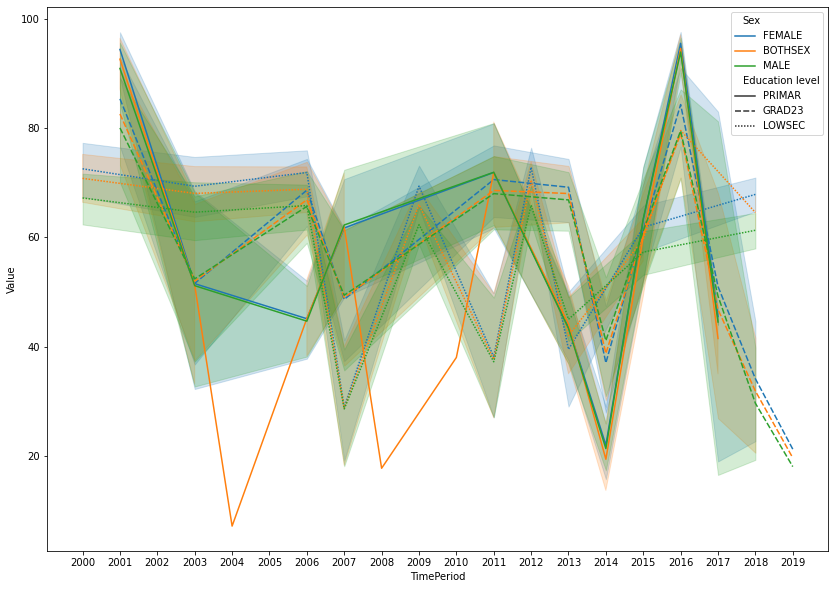

In [ ]:
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(np.arange(2000, 2021, step=1))
sns.lineplot(data=final_df_percent, x="TimePeriod", y="Value", hue="Sex", style="Education level", ax=ax)

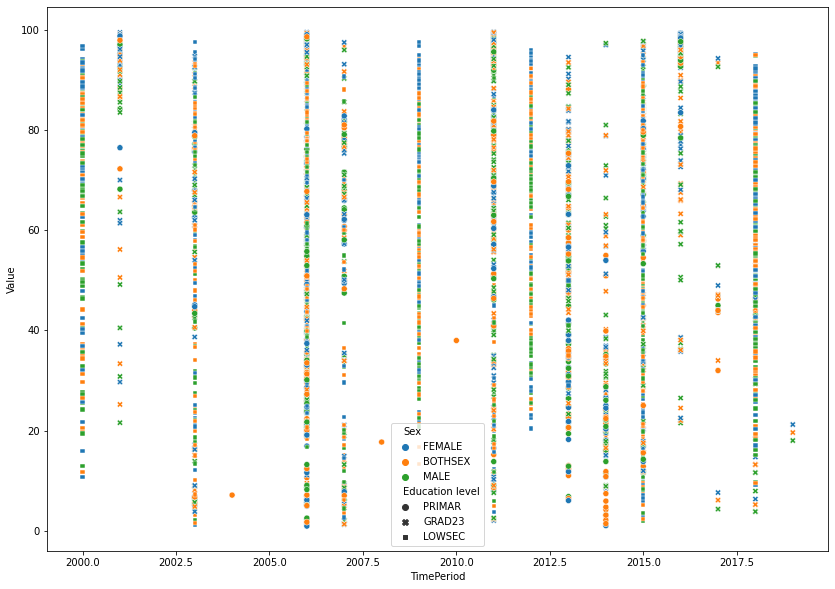

In [ ]:
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=final_df_percent, x="TimePeriod", y="Value", hue="Sex", style="Education level", ax=ax)

In [ ]:
sns.boxplot(data=final_df_percent[final_df_percent["GeoAreaCode"] == 76], x="Sex", y="Value")

In [ ]:
sns.scatterplot(data=final_df_percent[final_df_percent["GeoAreaCode"] == 776], x="TimePeriod", y="Value", hue="Sex", style="Education level")

In [ ]:

sns.boxplot(data=final_df[final_df["GeoAreaCode"] == 776], x="Education level", y="Value", hue="Sex")

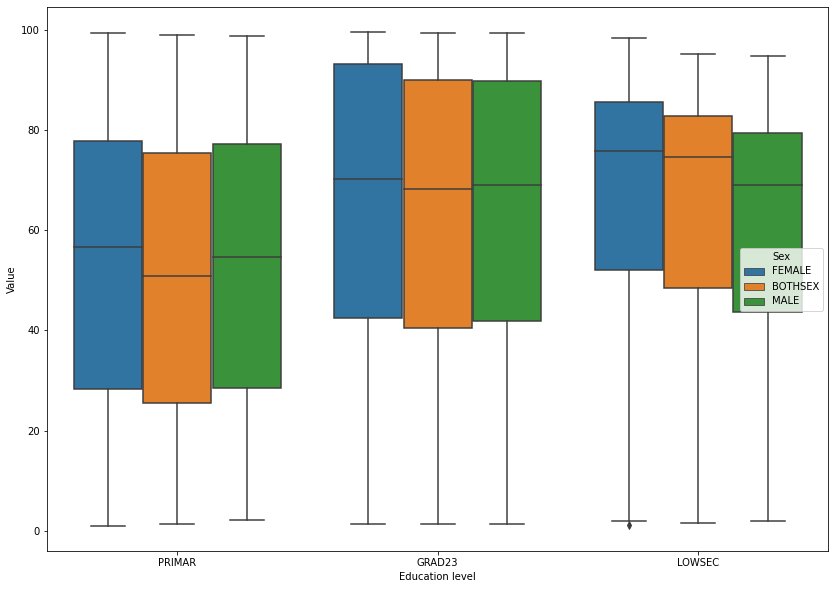

In [ ]:
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=final_df_percent, x="Education level", y="Value", hue="Sex", ax=ax)

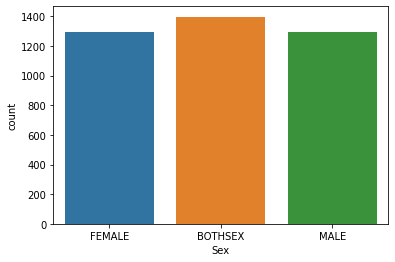

In [ ]:
sns.countplot(data=final_df_percent, x ="Sex" )

In [ ]:
sns.boxplot(data=final_df_percent[final_df_percent["GeoAreaCode"] == 776], x="Education level", y="Value", hue="Sex")

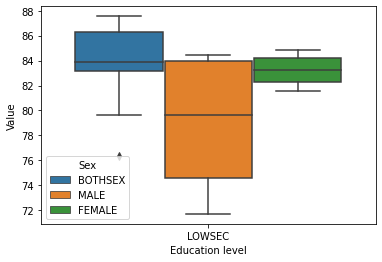

In [ ]:

sns.boxplot(data=final_df[final_df["GeoAreaCode"] == 756], x="Education level", y="Value", hue="Sex")

In [ ]:
df_test = final_df[final_df["TimePeriod"] == 2019]

**Convert the categorical data in to the numerical data to feed in to the Machine Learning model.**

In [ ]:
final_df_percent_numeric = final_df_percent.copy()

In [ ]:
final_df_percent_numeric = final_df_percent_numeric.drop("GeoAreaName", axis=1)

In [ ]:
final_df_percent_numeric

In [ ]:
final_df_percent_numeric = pd.get_dummies(final_df_percent_numeric,drop_first=True)

In [ ]:
final_df_percent_numeric["TimePeriod"].unique()

array([2006, 2018, 2000, 2003, 2009, 2012, 2014, 2015, 2013, 2001, 2007,
       2011, 2016, 2004, 2017, 2010, 2008, 2019])

In [ ]:
test = final_df_percent_numeric[final_df_percent_numeric["TimePeriod"] == 2019]

In [ ]:
train = final_df_percent_numeric[final_df_percent_numeric["TimePeriod"] < 2019]

In [ ]:
test_y = test["Value"]
train_y = train["Value"]
test = test.drop("Value", axis=1)
train = train.drop("Value", axis=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear_regressor2 = LinearRegression()
linear_regressor2.fit(train,train_y)
result = linear_regressor2.score(test, test_y)

In [ ]:
test_predict = linear_regressor2.predict(test)

In [ ]:
final_prediction_df = pd.DataFrame(test, columns=test.columns).reset_index()

In [ ]:
final_prediction_val = pd.DataFrame(test_predict, columns=["Value"]).reset_index()

In [ ]:
final_prediction_df = pd.concat([final_prediction_df, final_prediction_val], axis=1)

In [ ]:
final_prediction_df["Value"]

0    25.664171
1    21.702375
2    23.722839
Name: Value, dtype: float64

In [ ]:
test_y

3403    21.2
3404    18.0
3405    19.6
Name: Value, dtype: float64